<b><font color='red' size="10">4) Les Arbres de Décision </font> </b>

<b><font color='black' size="5">Nous allons tester maintenant les arbres de décision. Dans ces arbres chaque noeud divise les observations en 2 branches en fonction d'une condition (par exemple alcohol<=12) et chaque feuille de l'arbre correspond à une qualité égale à la moyenne de la qualité des observations présentes dans la feuille.
Une nouvelle observation x n'aura qu'à suivre le chemin de l'arbre en fonction des conditions des noeuds pour atterir dans une feuille. La prédiction sera alors la qualité de la feuille.</font> </b>

<b><font color='blue' size="6">a) Préparation des données (comme précédemment)</font> </b>

/home/henri/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(1074, 10)
(1074,)


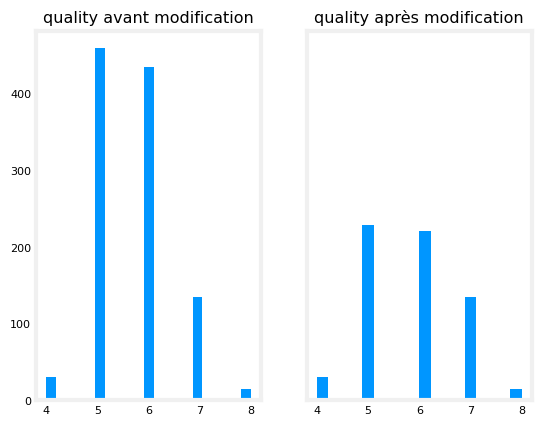

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
df = pd.read_csv('WineQT.csv')
import numpy as np
import matplotlib.pyplot as plt

def plot_hists(df):
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
    for n in range(12):
        i = n % 3
        j = n % 4
        ax[i, j].hist(df.iloc[:, n], bins='auto')
        ax[i, j].set_xlabel(df.columns[n])

#On normalise : mettre entre 0 et 1
def normalize(df, property, parameter):
    df[property] = np.log(df[property] + parameter)


normalize(df, "fixed acidity", -2.3)
normalize(df, "sulphates", -0.24)
normalize(df, "total sulfur dioxide", 5)
normalize(df, "residual sugar", -1.1)
normalize(df, "chlorides", -0.005)
normalize(df, "volatile acidity", 2)
normalize(df, "free sulfur dioxide", 2)
#plot_hists(df)

standardized = (df - df.mean()) / df.std()
standardized = standardized[(np.abs(standardized) < 3).all(axis=1)]
rows = np.setdiff1d(list(df.index), list(standardized.index))
df.drop(index=rows, inplace=True)
#plot_hists(df)

import numpy as np
import matplotlib.pyplot as plt

#Préparation des données
y = df['quality']
X= [df['fixed acidity'],  df['volatile acidity']  ,df['citric acid']  ,df['residual sugar'],  df['chlorides'],df['free sulfur dioxide']  ,df['total sulfur dioxide'],  df['density']    ,df['pH'],  df['sulphates']]
X=np.transpose(np.array(X))
y=np.asarray(y)
print(X.shape)
print(y.shape)
X_features = ['fixed acidity',  'volatile acidity'  ,'citric acid'  ,'residual sugar',  'chlorides','free sulfur dioxide'  ,'total sulfur dioxide',  'density'    ,'pH',  'sulphates']
nb_feature=len(X_features)


#on supprime aleatoirement des valeurs de notes 5 et 6 (diviser par 2)
supp=[]
for i in range(len(y)):
    if y[i]==5 or y[i]==6:
        rand=random.random()
        if(rand>0.5):
            supp.append(i)
y2=np.delete(y,supp)

X2=np.delete(X,supp,0)

#Plot des modifications
fig,ax=plt.subplots(1,2,sharey=True)
ax[0].hist(y, bins='auto',label="quality")
ax[0].set_title("quality avant modification")

ax[1].hist(y2, bins='auto',label="quality")
ax[1].set_title("quality après modification")

#on créé les jeux de données
from sklearn.model_selection import train_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X2, y2, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)

def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

 # normalize the original features
X_train, X_mu, X_sigma = zscore_normalize_features(X_train)
X_cv, X_mu, X_sigma = zscore_normalize_features(X_cv)
X_test, X_mu, X_sigma = zscore_normalize_features(X_test)

<b><font color='blue' size="6">b) Mise en place d'un arbre de décision</font> </b>

<b><font color='black' size="5">On va commencer par mettre en place un arbre de décision. Pour cela :<br>

- on commence à la racine avec tout le dataset qu'on veut split.<br>
- on teste les splits sur toutes les caractéristiques du vin avec un certain nombre de valeurs (ex: sulfate <= valeurn°12).<br>
- on décide le split choisi en calculant l'utilité = le gain d'information qui dépend de la pureté des noeuds résultant du split.<br>
- on sépare le dataset en fonction du meilleur split et on refait récursivement la même chose sur les 2 nouveaux noeuds.<br>
- on s'arrête lorsque un noeud est totalement pure (=tous les vins de même qualité), ou lorsqu'on atteint une certaine profondeur.</font> </b>

<b><font color='orange' size="5">Codes de la structure de l'arbre pour la prédiction du vin:</font> </b>


In [98]:
class ArbreBinaireVin:
    def __init__(self):
        self.qualite = 0
        self.split=0
        self.carac=0
        self.enfant_gauche = None
        self.enfant_droit = None


    def insert_gauche(self):
        self.enfant_gauche = ArbreBinaireVin()

    def insert_droit(self):
        self.enfant_droit = ArbreBinaireVin()

    def get_valeur(self):
        return self.valeur

    def get_gauche(self):
        return self.enfant_gauche

    def get_droit(self):
        return self.enfant_droit

    
    def get_predictionVin(self,x):

        if(x[self.carac]<=self.split):
            if(self.enfant_gauche==None):
                return self.qualite
            else:
                return self.enfant_gauche.get_predictionVin(x)
        else:
            if(self.enfant_droit==None):
                return self.qualite
            else:
                return self.enfant_droit.get_predictionVin(x)

    def affiche(self):
        print(self.carac,X_features[self.carac],self.split,self.qualite)
        if(self.enfant_gauche!=None):
            self.enfant_gauche.affiche()
        if(self.enfant_droit!=None):
            self.enfant_droit.affiche()

<b><font color='orange' size="5">Codes de la construction de l'arbre avec le dataset d'entrainement:</font> </b>

In [103]:
#calcul de l'impureté d'un noeuf, pour savoir à quel point le noeud est pur (=les vins qui s'y trouvent ont la même qualité)
def gini_Impurity(y):

    #on calcul le nombre de valeur par note de vin (0 à 8)
    tab_value=np.zeros(9)
    for loop in range(len(y)):
        tab_value[y[loop]]+=1
    #calcul de l'impureté
    impurity=1
    for loop in range(len(tab_value)):
        impurity-=(tab_value[loop]/sum(tab_value))**2
    return impurity
     
#split du noeud pour des valeurs continues (ex:split en fonction de la condition {X_alcohol<=12.355?})
def split_dataset_continue(X, node_indices, feature,t):

    left_indices = []
    right_indices = []
    for i in node_indices:
        if X[i,feature] <= t:
            left_indices.append(i)
        else:
            right_indices.append(i)
        
    return left_indices, right_indices 

#calcul du gain d'information = utilité d'un split, permet de choisir sur quelle condition on va split le noeud
def compute_information_gain_continue(X, y, node_indices, feature, t):
    
    left_indices, right_indices = split_dataset_continue(X, node_indices, feature,t)
    
    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]
    
    information_gain = 0
    
    node_entropy = gini_Impurity(y_node)
    left_entropy = gini_Impurity(y_left)
    right_entropy = gini_Impurity(y_right)
    w_left = len(X_left) / len(X_node)
    w_right = len(X_right) / len(X_node)
    weighted_entropy = w_left * left_entropy + w_right * right_entropy
    information_gain = node_entropy - weighted_entropy
    
    return information_gain

#garder la meilleur condition pour le meilleur split
def get_best_split_continue(X, y, node_indices):   
    num_features = X.shape[1]
    
    best_feature = -1

    max_info_gain = 0
    tmax=0

    tab_max_feature=np.zeros(num_features)
    tab_min_feature=np.zeros(num_features)
    for loop in range(num_features):
        tab_max_feature[loop]=np.max(np.transpose(X)[loop])
        tab_min_feature[loop]=np.min(np.transpose(X)[loop])
    
    for feature in range(num_features):
        tab_t_feature=np.linspace(tab_min_feature[feature], tab_max_feature[feature], len(X)-1)
        
        for t in range(len(tab_t_feature)):
            info_gain = compute_information_gain_continue(X, y, node_indices, feature,tab_t_feature[t])

            if info_gain > max_info_gain:
                max_info_gain = info_gain
                best_feature = feature
                tmax=tab_t_feature[t]
   
    return best_feature,tmax,max_info_gain

#construction recursive de l'arbre de décision:
#on commence à la racine avec tout le dataset
#on teste les splits sur toutes les caractéristiques du vin avec un certain nombre de valeurs (ex: sulfate <= valeurn°12)
#on décide la condition choisie en calculant l'utilité = le gain d'information qui dépend de la pureté des noeuds résultant du split
#on sépare le dataset en deux et on refait récursivement la même chose sur les 2 nouveaux noeuds.
#on s'arrête lorsque un noeud est totalement pure (=tous les vins de meme qualité), ou à une certaine profondeur
def build_tree_recursive_continue(X, y, node_indices, branch_name, max_depth, current_depth, tree, arbreVin):

    if current_depth == max_depth:
        qualite_node=np.mean(y[node_indices])
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        print(formatting,"note moyenne attribuée à la feuille :",qualite_node,"(",round(np.mean(y[node_indices])),")")

        arbreVin.qualite=round(qualite_node)

        return 0
   
    
    best_feature,tmax,max_info = get_best_split_continue(X, y, node_indices) 
    arbreVin.carac=best_feature
    arbreVin.split=tmax

    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %s <= %s, pour un gain de %s" % (formatting, current_depth, branch_name, X_features[best_feature], tmax,max_info))

    left_indices, right_indices = split_dataset_continue(X, node_indices, best_feature,tmax)
    tree.append((left_indices, right_indices, best_feature,tmax))
    
    if(len(left_indices)>1):
        arbreVin.insert_gauche()
        build_tree_recursive_continue(X, y, left_indices, "Left", max_depth, current_depth+1, tree,arbreVin.enfant_gauche)
    if(len(right_indices)>1):
        arbreVin.insert_droit()
        build_tree_recursive_continue(X, y, right_indices, "Right", max_depth, current_depth+1, tree,arbreVin.enfant_droit)
    return tree

<b><font color='black' size="5">Test de l'arbre de décision avec une profondeur maximale de 4:</font> </b>

In [107]:
tree = []
arbre = ArbreBinaireVin()
root_indices=list(range(0, len(X_train)))
build_tree_recursive_continue(X_train, y_train,root_indices, "Root", max_depth=4, current_depth=0, tree = tree, arbreVin=arbre);

/tmp/ipykernel_42683/506145069.py:13: RuntimeWarning: invalid value encountered in double_scalars
  impurity-=(tab_value[loop]/sum(tab_value))**2


 Depth 0, Root: Split on feature: sulphates <= -0.09272595611982037, pour un gain de 0.052469323042744875
- Depth 1, Left: Split on feature: total sulfur dioxide <= 0.853198588681813, pour un gain de 0.04485148373737924
-- Depth 2, Left: Split on feature: density <= 0.41867845114657687, pour un gain de 0.04332317923273732
--- Depth 3, Left: Split on feature: residual sugar <= 1.1300734780067812, pour un gain de 0.05027147181483804
    ---- Left leaf node with indices [2, 6, 13, 16, 17, 27, 33, 35, 37, 39, 43, 44, 46, 49, 56, 59, 63, 64, 70, 71, 73, 74, 76, 78, 79, 88, 93, 97, 103, 105, 110, 113, 118, 119, 120, 121, 125, 130, 136, 143, 150, 163, 164, 169, 173, 177, 179, 182, 183, 187, 188, 191, 194, 200, 209, 210, 215, 216, 219, 222, 225, 226, 228, 235, 236, 241, 243, 244, 248, 252, 255, 256, 260, 264, 266, 271, 272, 281, 283, 284, 286, 290, 291, 295, 306, 311, 314, 316, 320, 332, 335, 337, 344, 345, 355, 356, 365, 369, 374]
    ---- note moyenne attribuée à la feuille : 5.6363636363636

In [109]:
x=X_train[50]
print("vecteur x",x)
print("note prédite:",arbre.get_predictionVin(x))
print("vraie note :",y_train[50])

vecteur x [ 1.65989152 -0.56212655  1.29038469 -1.73235125  0.93061168  0.88161709
  0.30550152  0.39591505 -1.94880838  0.87331486]
note prédite: 7
vraie note : 7


<b><font color='black' size="5">On a construit l'arbre de profondeur max 4, il ne reste plus qu'à faire passer notre jeu de test dedans.</font> </b>


In [113]:
def calcul_error(yhat,y_test):
   
    cost = 0.0
    m=len(y_test)
    for i in range(m):                                
        cost = cost + (y_test[i] - yhat[i])**2   #scalar
    cost = cost / (2 * m)                 #scalar    
    return cost

def predict_model(arbre,X,y):
    yhat=[]
    for loop in range(len(X)):
        yhat.append(arbre.get_predictionVin(X[loop]))

    sum=0
    for loop in range(len(yhat)):
        if(y[loop] == yhat[loop]):
            sum+=1
    print('Train Accuracy (%): ',(sum/len(yhat))*100)

    nn_test_error =calcul_error(yhat,y)

    print(f"Set Classification Error: {nn_test_error:.4f}")

In [116]:
predict_model(arbre,X_test,y_test)

Train Accuracy (%):  53.96825396825397
Set Classification Error: 0.3135


<b><font color='black' size="5">Nous obtenons 53% de prédictions exactes sur le jeu de test.
Pour améliorer ce résultat, nous allons utiliser une version évoluée de l'arbre de décision : la Random Forest.
</font> </b>

<b><font color='blue' size="6">c) Forêt d'arbres décisionnels pour la qualité du vin </font> </b>

<b><font color='black' size="5">Nous allons enfin mettre en place une random forest ou forêt d'arbres décisionnels à l'aide la bibliothèque sklearn et xgboost.
Random forest va créer une multitude d'arbres de décision de ce type avec une part d'aléatoire dans le choix des splits et choisir l'arbre final grâce à un système de votes.</font> </b>

In [41]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

RANDOM_STATE = 55 ## We will pass it to every sklearn call so we ensure reproducibility

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [42]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train,y_train, eval_set = [(X_test,y_test)], early_stopping_rounds = 10)

[0]	validation_0-mlogloss:1.76413
[1]	validation_0-mlogloss:1.74212
[2]	validation_0-mlogloss:1.74340
[3]	validation_0-mlogloss:1.72256


/home/henri/.local/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-mlogloss:1.72616
[5]	validation_0-mlogloss:1.69494
[6]	validation_0-mlogloss:1.69315
[7]	validation_0-mlogloss:1.69298
[8]	validation_0-mlogloss:1.70397
[9]	validation_0-mlogloss:1.72146
[10]	validation_0-mlogloss:1.72980
[11]	validation_0-mlogloss:1.74967
[12]	validation_0-mlogloss:1.76279
[13]	validation_0-mlogloss:1.77983
[14]	validation_0-mlogloss:1.78464
[15]	validation_0-mlogloss:1.79472
[16]	validation_0-mlogloss:1.79150


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [43]:
xgb_model.best_iteration

7

In [44]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}")

print(xgb_model.classes_)
#print(xgb_model.classes_)

Metrics train:
	Accuracy score: 0.8093
Metrics test:
	Accuracy score: 0.8093
[0 1 2 3 4 5]


<b><font color='black' size="5">Le modèle random Forest nous permet d'obtenir sur le jeu de test 80% de précision, c'est le meilleur score obtenu. On choisit donc cette méthode</font> </b>